# Flight Booking Price Prediction

The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import  plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,precision_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVC
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [5]:
df=pd.read_csv("D:\\intellipaat\\Flight_Booking.csv")

In [6]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
#removed the unnecessary column to save processing time 
df=df.drop(columns=['Unnamed: 0','flight'])

In [6]:
df.shape

(300153, 10)

In [8]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
#checking out the missing values
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

[]

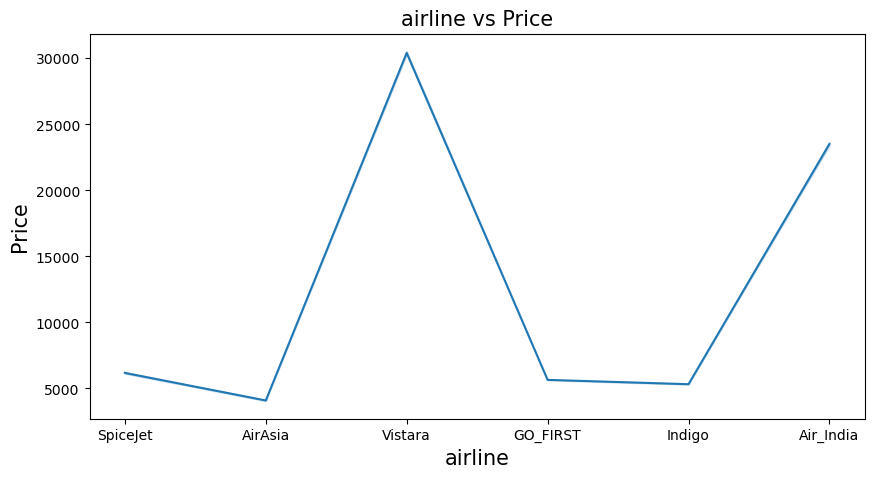

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('airline vs Price',fontsize=15)
plt.xlabel('airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.plot()

There is a variation in price with 
different airlines

[]

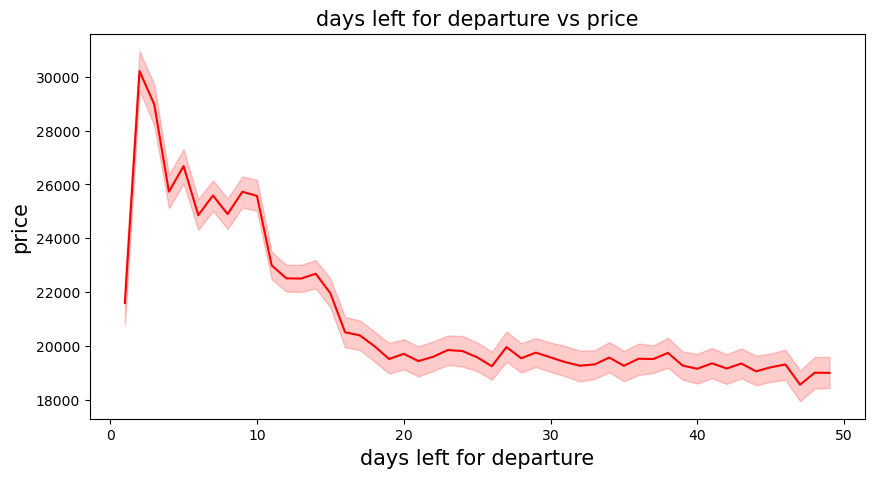

In [15]:
#now we will see its lineplot between days left for departure and price to see that if there are some
#price changes occures or not.
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='days_left',y='price',color='red')
plt.title('days left for departure vs price',fontsize=15)
plt.xlabel('days left for departure',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.plot()

here we can see that in this lineplot as the days left for departure decreases the price of the 
tickets are rising

<AxesSubplot:xlabel='airline', ylabel='price'>

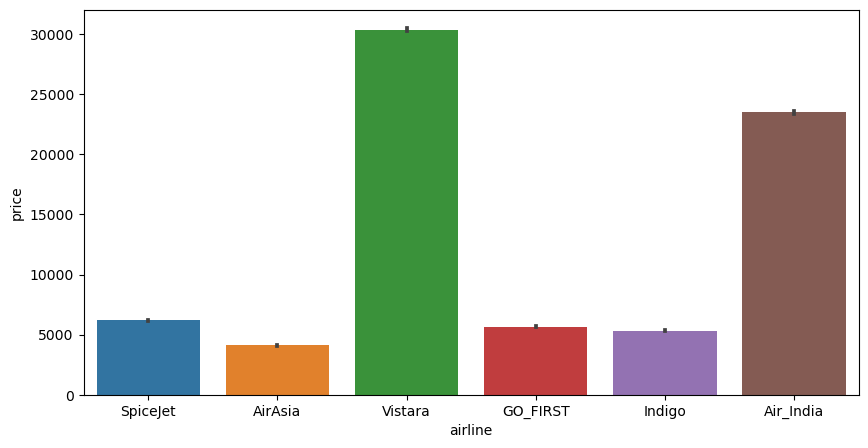

In [16]:
#now we will we see the barplot between the airline and price to see the price of ticket for airlines.
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df)


these are the price range for all airlines

<AxesSubplot:xlabel='class', ylabel='price'>

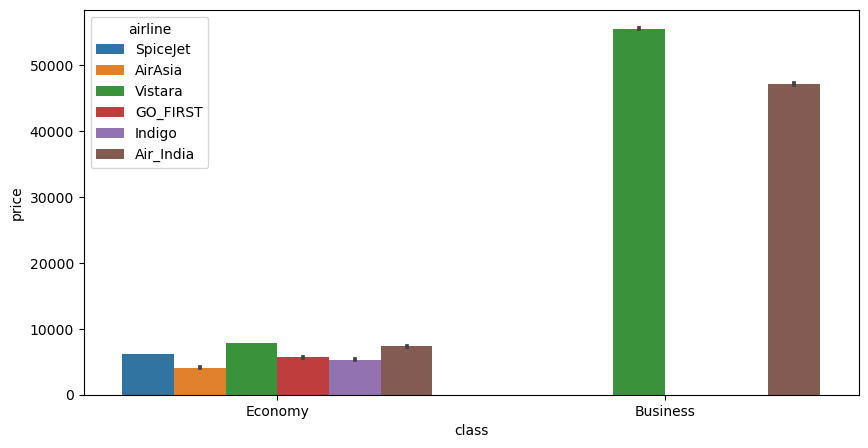

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='class',y='price',hue='airline',data=df)

here in this barplot we can see that the price difference between economy and business class

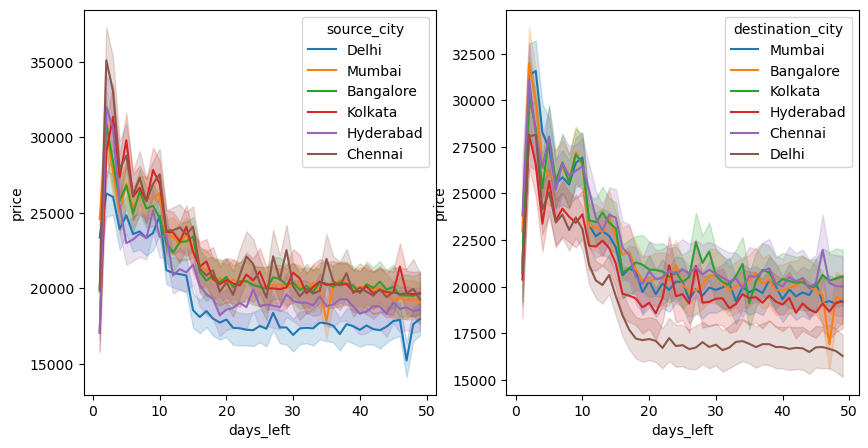

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(x='days_left',y='price',hue='source_city',ax=ax[0],data=df)
sns.lineplot(x='days_left',y='price',hue='destination_city',ax=ax[1],data=df)
plt.show()

Range of price of flights with source 
and destination city according to 
the days left

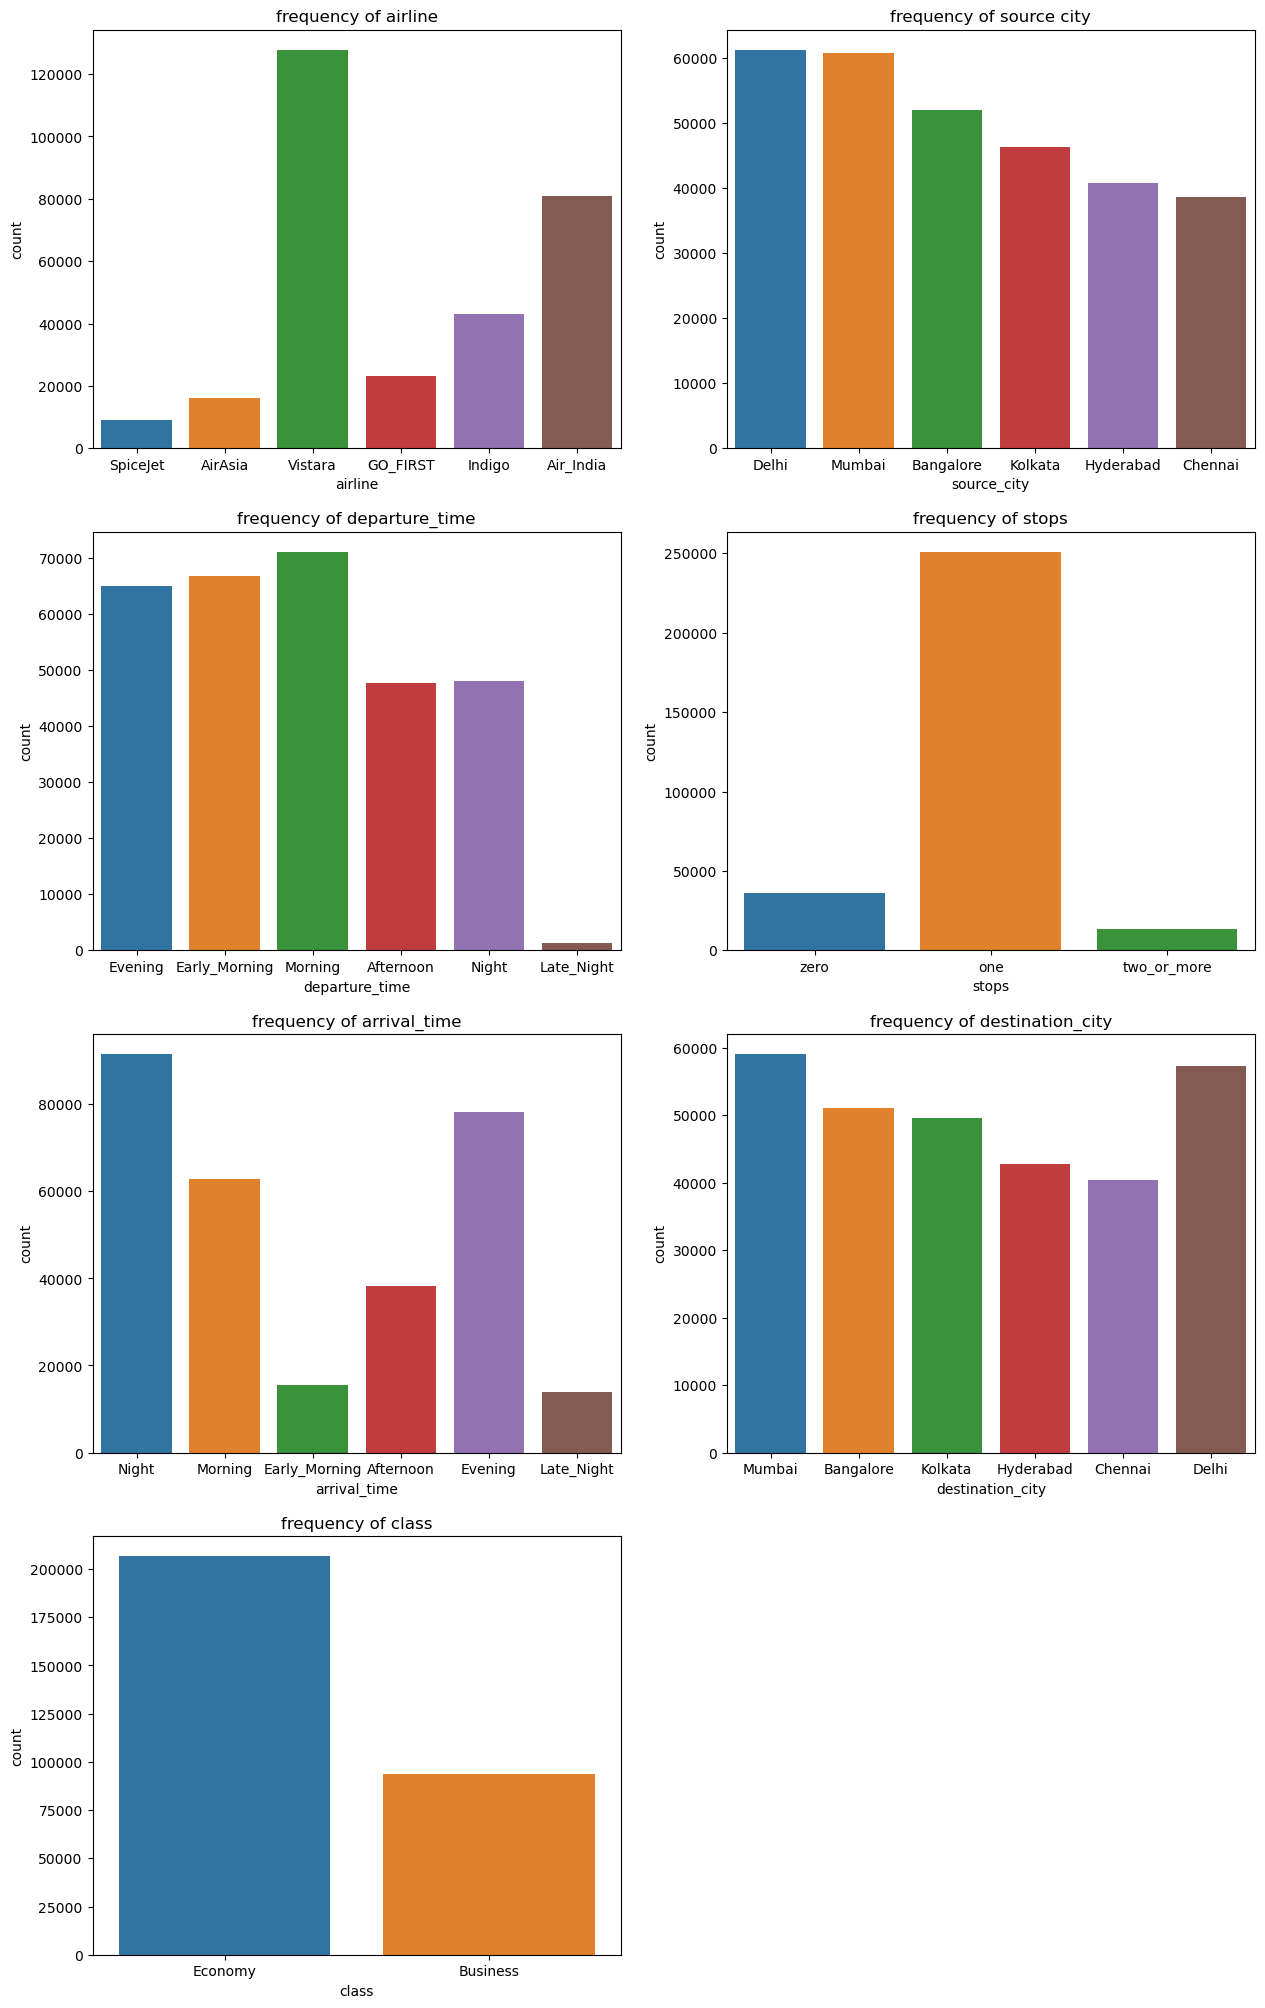

In [19]:
plt.figure(figsize=(15,25))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'])
plt.title('frequency of airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'])
plt.title('frequency of source city')


plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'])
plt.title('frequency of departure_time')



plt.subplot(4,2,4)
sns.countplot(x=df['stops'])
plt.title('frequency of stops')



plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'])
plt.title('frequency of arrival_time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'])
plt.title('frequency of destination_city')


plt.subplot(4,2,7)
sns.countplot(x=df['class'])
plt.title('frequency of class')

plt.show()


visualization of categorical features with countplot

In [9]:
#now we will perform label encoding
le= LabelEncoder()

df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])
#df['flight']=le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int32  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 14.9 MB


[]

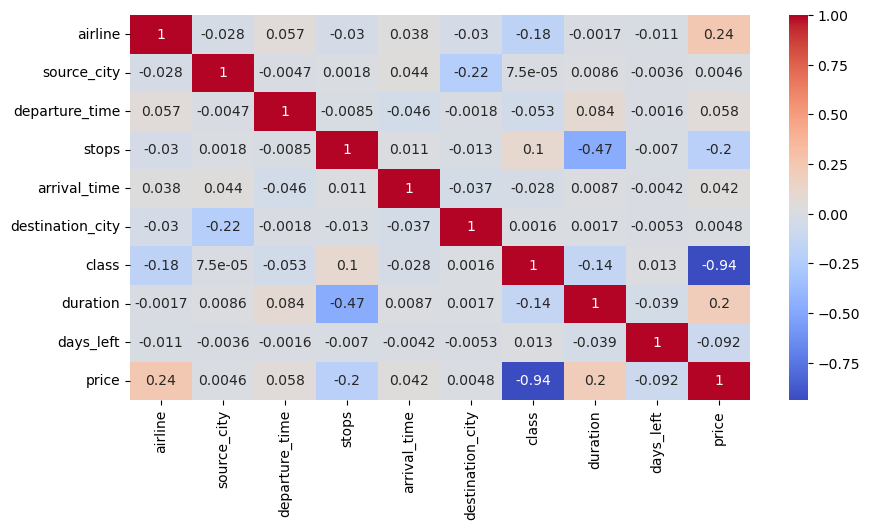

In [21]:
#FEATURE SELECTION
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=test,cmap="coolwarm")
plt.plot()

Plotting the correlation graph to see the correlation between features and dependent variable.


In [23]:
#from patsy import dmatrices

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if ((df[col].dtype !='object') & (col !='price') ):
        col_list.append(col)
x=df[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                         for i in range(len(x.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


Selecting the features using VIF. VIF should be less than 5 and we can see that all features vif is 
lesser than 5.

In [10]:
X=df.drop(columns=['price'])
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_value','Predicted_value'])
difference

,Actual_value,Predicted_value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


Applied standardization and implementing Linear Regression Model to predict the price of a flight.


In [14]:
from sklearn.metrics import r2_score


r2_score(y_test,y_pred)
r2_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error


mean_absolute_percentage_error(y_test,y_pred)
mean_absolute_percentage_error

mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

root_mean_sq_error=np.sqrt(metrics.root_mean_squared_error(y_test,y_pred))
root_mean_sq_error


49200540.293721996

In [15]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [16]:
# Import libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


# Calculate metrics
r2 = r2_score(y_test, y_pred) # R-squared score
mse = mean_squared_error(y_test, y_pred) # Mean squared error
mae = mean_absolute_error(y_test, y_pred) # Mean absolute error
rmse = np.sqrt(mse) # Root mean squared error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 # Mean absolute percentage error

# Print metrics
print("R-squared score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("Mean absolute percentage error:", mape)

R-squared score: 0.904554350718816
Mean squared error: 49200540.293721996
Mean absolute error: 4624.9948680168745
Root mean squared error: 7014.3096804833185
Mean absolute percentage error: 43.53581089683306


Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) 
of the Linear regression model is 7014.31 and Mean absolute percentage 
error(MAPE) is 43.53 percent. Lower the RMSE and MAPE better the model.

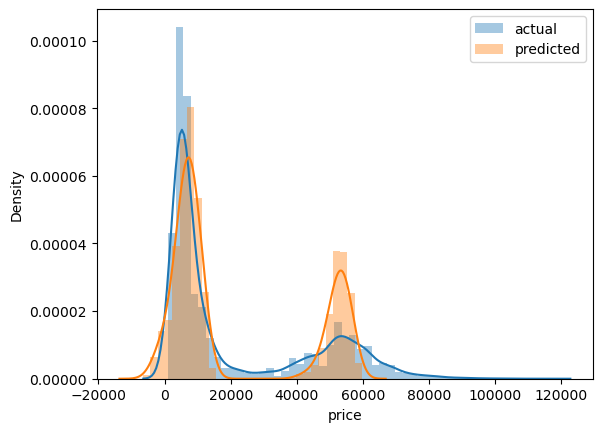

In [18]:
#plotting graph between actual and predicted price of flights.
sns.distplot(y_test,label='actual')
sns.distplot(y_pred,label='predicted')
plt.legend()

R-squared score: 0.9755390301828419
Mean squared error: 12609196.33504819
Mean absolute error: 1174.9062706490538
Root mean squared error: 3550.9430205296435
Mean absolute percentage error: 7.354529301366236


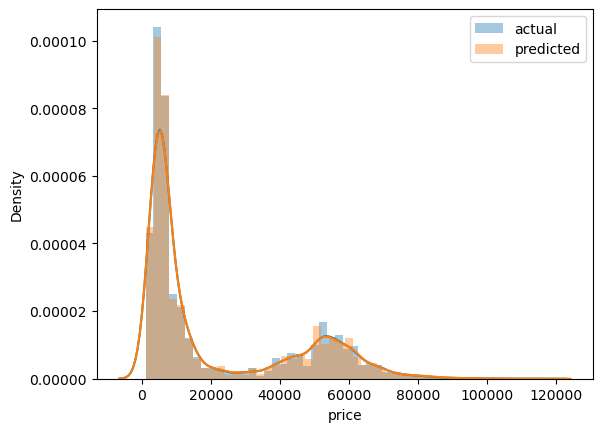

In [20]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred) # R-squared score
mse = mean_squared_error(y_test, y_pred) # Mean squared error
mae = mean_absolute_error(y_test, y_pred) # Mean absolute error
rmse = np.sqrt(mse) # Root mean squared error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 # Mean absolute percentage error

# Print metrics
print("R-squared score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("Mean absolute percentage error:", mape)

#plotting graph between actual and predicted price of flights.
sns.distplot(y_test,label='actual')
sns.distplot(y_pred,label='predicted')
plt.legend()


Mean absolute percentage 
error is 7.38 percent and RMSE 
is 3543 which is less than the 
linear regression and decision 
tree model

R-squared score: 0.9848965999622991
Mean squared error: 7785534.990054285
Mean absolute error: 1090.839952569281
Root mean squared error: 2790.257154825391
Mean absolute percentage error: 7.038519812175892


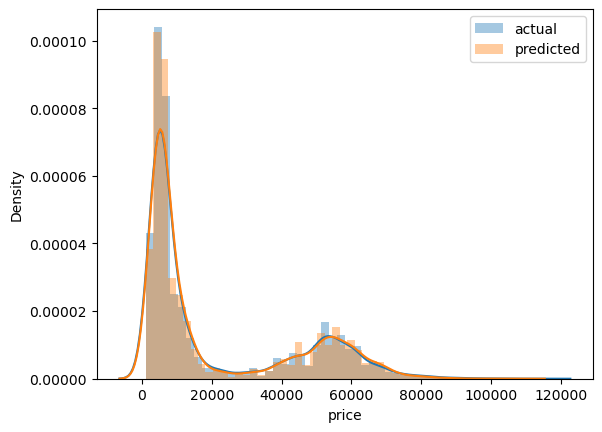

In [22]:
#now we will apply random forest regressor on this
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred) # R-squared score
mse = mean_squared_error(y_test, y_pred) # Mean squared error
mae = mean_absolute_error(y_test, y_pred) # Mean absolute error
rmse = np.sqrt(mse) # Root mean squared error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 # Mean absolute percentage error

# Print metrics
print("R-squared score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("Mean absolute percentage error:", mape)

#plotting graph between actual and predicted price of flights.
sns.distplot(y_test,label='actual')
sns.distplot(y_pred,label='predicted')
plt.legend()


Mean absolute percentage 
error is 7.03 percent and RMSE 
is 2790 which is less than the 
linear regression and decision 
tree model hence it is the best fit model for price prediction